In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import sklearn.ensemble as ensemble
import sklearn.preprocessing as pre
import sklearn.model_selection as model_selection
import statsmodels.formula.api as smf

In [58]:
path=r'F:\Data_science_with_python\Graded_assessment\amsterdam.json'
data=pd.read_json(path)

In [59]:
# Dropping the rows which are null
data_new=data.drop(data[data.isnull().any(axis=1)].index)

In [60]:
# build a RF regressor
enc=pre.LabelEncoder()
data_new['room_type']=enc.fit_transform(data_new['room_type'])
enc_instant_bookable=pre.LabelEncoder()
data_new['instant_bookable']=enc_instant_bookable.fit_transform(data_new['instant_bookable'])
data_new['price']=data_new['price'].map(lambda x:re.sub('[^A-Za-z0-9]+', '', x))

X=data_new.drop('price', axis=1)
Y=data_new['price']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, random_state=200, test_size=0.20)

In [61]:
model=ensemble.RandomForestRegressor(n_estimators=100, n_jobs=-1)
model=model.fit(X_train,Y_train)
model.predict(X_test)

array([12709., 13486., 11674., ..., 17456.,  9192., 10586.])

In [62]:
model.score(X_test, Y_test)

0.37225416417311175

In [63]:
model.feature_importances_

array([0.01849065, 0.27008047, 0.07662028, 0.04955094, 0.05558183,
       0.06667573, 0.0825892 , 0.02460691, 0.13886964, 0.17207551,
       0.03452126, 0.01033759])

In [64]:
pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

accommodates                      0.270080
longitude                         0.172076
latitude                          0.138870
number_of_reviews                 0.082589
bathrooms                         0.076620
minimum_nights                    0.066676
guests_included                   0.055582
bedrooms                          0.049551
room_type                         0.034521
calculated_host_listings_count    0.024607
host_listings_count               0.018491
instant_bookable                  0.010338
dtype: float64

In [27]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.087489 to fit



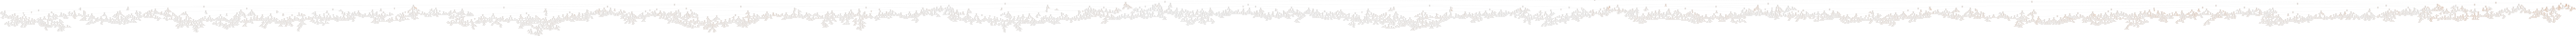

In [33]:
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn import tree
dot_data = tree.export_graphviz(model.estimators_[0],out_file=None,feature_names=X_train.columns,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

In [30]:
model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1747263338, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2139713503, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=717341317, splitter='best'),
 DecisionTreeRegress

In [65]:
# build a bagged tree regressor model
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
regressor=BaggingRegressor(oob_score=True, n_jobs=-1,n_estimators=500, random_state=200,base_estimator=DecisionTreeRegressor())

In [67]:
regressor.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=200, verbose=0, warm_start=False)

In [68]:
regressor.oob_score_

0.4488906318328847

In [69]:
regressor.score(X_test,Y_test)

0.38103577561364266

In [48]:
data_new.sample(10)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
8513,1.0,2,1.0,1.0,1,1,35,1,9900,52.349553,4.891750,0,0
13902,1.0,4,1.0,2.0,2,2,13,1,19500,52.376592,4.862040,0,0
5551,1.0,2,1.0,1.0,1,2,25,1,15000,52.357178,4.908668,0,0
2896,8.0,16,2.0,4.0,12,2,13,8,59900,52.365521,4.880396,0,1
2147,2.0,8,4.0,6.0,6,2,25,2,65000,52.379544,4.889390,0,1
15085,2.0,2,1.5,1.0,1,3,55,2,4900,52.341751,4.793518,1,0
8722,1.0,3,1.0,2.0,1,1,0,1,13900,52.344216,4.907680,0,0
8200,2.0,2,1.0,0.0,1,3,62,2,11500,52.356962,4.898735,1,1
13525,1.0,4,1.0,2.0,2,2,25,1,15000,52.366754,4.872593,0,0
6327,1.0,4,1.0,2.0,1,7,5,1,15000,52.353625,4.913146,0,0


In [75]:
data_new_dummies=data.drop(data[data.isnull().any(axis=1)].index)
data_new_dummies['price']=data_new_dummies['price'].map(lambda x:re.sub('[^A-Za-z0-9]+', '', x))

In [76]:
#data_new_dummies=pd.get_dummies(data_new_dummies)
X_dummies=data_new_dummies.drop('price', axis=1)
Y_dummies=data_new_dummies['price']
X_dummies=pd.get_dummies(X_dummies)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_dummies,Y_dummies, random_state=200, test_size=0.20)

In [77]:
X_train.sample(10)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
10109,2.0,2,1.0,1.0,1,1,0,2,52.355737,4.863451,0,1,0,1,0
472,1.0,2,1.0,1.0,1,2,1,1,52.413021,4.919058,1,0,0,0,1
8995,1.0,2,1.0,1.0,1,2,0,1,52.346600,4.903597,1,0,0,1,0
2748,1.0,2,1.0,1.0,1,2,11,1,52.377318,4.883607,0,1,0,1,0
6494,1.0,2,1.0,1.0,1,3,1,1,52.352127,4.926819,0,1,0,1,0
6919,1.0,4,2.0,3.0,4,4,37,1,52.388632,4.878538,1,0,0,1,0
9553,1.0,2,1.5,1.0,1,3,12,1,52.349691,4.905466,1,0,0,1,0
2921,1.0,4,1.5,2.0,4,1,7,1,52.378831,4.887736,1,0,0,1,0
2917,4.0,2,1.5,1.0,1,1,28,4,52.369952,4.886929,0,1,0,1,0
9964,34.0,2,1.0,1.0,1,2,6,31,52.351011,4.852223,1,0,0,0,1


In [78]:
model_dummy=ensemble.RandomForestRegressor(n_estimators=500, n_jobs=-1)
model_dummy=model_dummy.fit(X_train,Y_train)
model_dummy.predict(X_test)

array([12694.4, 13679.2, 11252.6, ..., 17798. ,  9546.6, 10839. ])

In [79]:
model_dummy.score(X_test, Y_test)

0.38888949544664897

In [81]:
pd.Series(model_dummy.feature_importances_,index=X_train.columns).sort_values(ascending=False)

accommodates                      0.274236
longitude                         0.169242
latitude                          0.141246
number_of_reviews                 0.079705
bathrooms                         0.073302
minimum_nights                    0.062945
bedrooms                          0.053794
guests_included                   0.052746
room_type_Entire home/apt         0.031729
calculated_host_listings_count    0.024680
host_listings_count               0.016424
instant_bookable_f                0.007319
instant_bookable_t                0.006784
room_type_Private room            0.005449
room_type_Shared room             0.000398
dtype: float64

In [94]:
import statsmodels.formula.api as smf
import patsy
train=data_new_dummies.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

In [95]:
train.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [101]:
mod_lenier_regrression=smf.ols("""price~accommodates""",data=train).fit()
#print(mod_lenier_regrression.summary())

In [102]:
train.shape

(10604, 13)

In [103]:
mod_lenier_regrression.summary()

ValueError: shapes (10604,344) and (10604,344) not aligned: 344 (dim 1) != 10604 (dim 0)